In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import random 
from plotnine import *
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
import pickle
import matplotlib.colors as mcolors

In [2]:
import hashlib
# codigo adaptado de chat gpt
def get_color(integer, alpha=1.0):
    # Convert the integer to a unique string using hashing
    hash_object = hashlib.sha256(str(integer).encode())
    hex_dig = hash_object.hexdigest()
    # Convert the hexadecimal hash to RGB values
    r = int(hex_dig[:2], 16) % 256
    g = int(hex_dig[2:4], 16) % 256
    b = int(hex_dig[4:6], 16) % 256
    # Format RGB values into a color string
    color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    # Return RGB values and alpha
    return (r / 255, g / 255, b / 255, alpha)
def get_colors_for_list(integer_list, alpha=1.0):
    colors = []
    for integer in integer_list:
        color = get_color(integer, alpha=alpha)
        colors.append(color)
    return colors


In [3]:

# adaptado de chat gpt 
def adjustcolor(color_name, alpha):
    # Convertir nombre de color a RGB
    rgb = mcolors.CSS4_COLORS.get(color_name)
    if rgb is None:
        raise ValueError(f"El color '{color_name}' no es válido.")
    
    # Convertir RGB a hexadecimal
    r, g, b = mcolors.to_rgb(rgb)
    hex_color = f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
    
    # Agregar canal alpha
    return f'{hex_color}{int(255 * alpha):02x}'



In [4]:
usuarios=pd.read_csv('animelist.csv',
                     na_values=["Unknown"],
                     header=0,
                     usecols=[0,1,2,3],
                     names=["user_id","anime_id","rating" ,"watching_status"],
                     dtype={"user_id":str,"anime_id":str,"rating":np.float64,"watching_status":np.float64})

In [5]:
IndicesMuestra=pd.read_csv('muestras.txt',dtype={'muestras':str})

In [6]:
IndicesMuestra=IndicesMuestra['muestras']

In [7]:
anime=pd.read_csv('anime.csv', dtype={'id':str})

In [8]:
anime

id                                        Name  Score  \
0          1                                Cowboy Bebop   8.78   
1        100        Shin Shirayuki-hime Densetsu Prétear   7.20   
2       1000               Uchuu Kaizoku Captain Herlock   7.71   
3      10000      Esper Mami Special: My Angel Mami-chan    NaN   
4      10003           Kago Shintarou Anime Sakuhin Shuu   5.01   
...      ...                                         ...    ...   
16209   9991    Bremen 4: Jigoku no Naka no Tenshi-tachi   5.88   
16210   9993               Samuraider: Nazo no Tenkousei    NaN   
16211   9996                                 Hyouge Mono   7.99   
16212   9998  Chuuhai Lemon: Love 30s - Ame ni Nurete mo    NaN   
16213   9999                One Piece 3D: Mugiwara Chase   7.07   

                                                  Genres  Episodes  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space     26.00   
1      Comedy, Drama, Fantasy, Magic, Romance, Shoujo...     13.00   
2        Action, Sci-Fi, Adventure, Space, Drama, Seinen     42.00   
3                      Comedy, Super Power, Supernatural      1.00   
4                       Comedy, Dementia, Horror, Seinen     15.00   
...                                                  ...       ...   
16209                                    Kids, Adventure      1.00   
16210                             Action, Drama, Samurai      1.00   
16211                        Historical, Samurai, Seinen     39.00   
16212                     Police, Comedy, Romance, Drama      1.00   
16213        Action, Adventure, Comedy, Fantasy, Shounen      1.00   

             Aired  
0      Spring 1998  
1      Spring 2001  
2      Spring 1978  
3              NaN  
4              NaN  
...            ...  
16209          NaN  
16210          NaN  
16211  Spring 2011  
16212          NaN  
16213          NaN  

[16214 rows x 6 columns]

In [9]:
IndicesMuestra

0        1156
1         244
2        1281
3       37563
4        6408
        ...  
1320    36753
1321     1912
1322    38797
1323      850
1324      553
Name: muestras, Length: 1325, dtype: object

In [10]:
anime['Genres'] = anime['Genres'].fillna('').astype(str) 
anime['Aired'] = anime['Aired'].fillna('').astype(str)# como hay NAS entonces el cuaderno de jupyter no lo lee

Se filtra el DataFrame de los usuarios tomando únicamente las filas que tengan el ID de los animes y el estado "completo", es decir, que ya terminaron de ver la serie.


In [11]:
anime = anime.query("id in @ IndicesMuestra").sort_values(by=["id"], ascending=True).reset_index(drop=True)


In [12]:
id=anime['id'].unique()
len(id)

1325

In [13]:
usuarios=(usuarios
 .query('anime_id in @id and watching_status==2')
.sort_values(by=["user_id", "anime_id"], ascending=[True, True]).reset_index(drop=True))


In [14]:
usuarios=usuarios.drop(['watching_status'], axis=1)

Se realiza un left join con las dos bases de datos restantes.


In [15]:
usuarios=usuarios.merge(anime,left_on="anime_id",right_on="id",how="left")


In [16]:
usuarios

user_id anime_id  rating    id  \
0             0     1004    5.00  1004   
1             0      174    4.00   174   
2             0      199    8.00   199   
3             0     2913    6.00  2913   
4             0      430    9.00   430   
...         ...      ...     ...   ...   
8710323   99997      874    4.00   874   
8710324   99997      934    8.00   934   
8710325   99997     9735    0.00  9735   
8710326   99997     9756    7.00  9756   
8710327   99998      199    9.00   199   

                                                    Name  Score  \
0                               Kanojo to Kanojo no Neko   7.33   
1                                           Tenjou Tenge   6.93   
2                          Sen to Chihiro no Kamikakushi   8.83   
3                Daisougen no Chiisana Tenshi: Bush Baby   7.01   
4        Fullmetal Alchemist: The Conqueror of Shamballa   7.57   
...                                                  ...    ...   
8710323                                   Digimon Tamers   7.62   
8710324                        Higurashi no Naku Koro ni   7.95   
8710325                 Gintama: Shinyaku Benizakura-hen   8.27   
8710326                       Mahou Shoujo Madoka★Magica   8.38   
8710327                    Sen to Chihiro no Kamikakushi   8.83   

                                                    Genres  Episodes  \
0             Drama, Psychological, Romance, Slice of Life      1.00   
1        Action, Ecchi, Martial Arts, Comedy, Super Pow...     24.00   
2                           Adventure, Supernatural, Drama      1.00   
3                                         Adventure, Drama     40.00   
4        Military, Comedy, Historical, Drama, Fantasy, ...      1.00   
...                                                    ...       ...   
8710323         Adventure, Comedy, Drama, Fantasy, Shounen     51.00   
8710324  Mystery, Dementia, Horror, Psychological, Supe...     26.00   
8710325  Action, Comedy, Historical, Parody, Samurai, S...      1.00   
8710326              Psychological, Drama, Magic, Thriller     12.00   
8710327                     Adventure, Supernatural, Drama      1.00   

               Aired  
0                     
1        Spring 2004  
2                     
3        Winter 1992  
4                     
...              ...  
8710323  Spring 2001  
8710324  Spring 2006  
8710325               
8710326  Winter 2011  
8710327               

[8710328 rows x 9 columns]

Se crean dos DataFrames: uno para los usuarios (USERS) y otro para los animes (ANIMES).
Para USERS:
- Se obtienen los valores únicos de la columna 'user_id'.
- Se generan identificadores únicos para cada usuario.
Para ANIM- Se generannerar identificadores únicos para cada anime, asegurando que sean distintos de los identificadores de usua

Para utilizar en la creación de un grafo con la librería `igraph`, es esencial que los identificadores sean únicos y distintos entre sí para evitar confusiones. rios.


In [17]:
USERS = pd.DataFrame((usuarios['user_id'].unique(),  # Obtener valores únicos de la primera columna
                  range(len(usuarios['user_id'].unique()))),  # Generar identificadores únicos
                 index=['user', 'Identificador']).T  # Transponer para obtener un DataFrame

# Creación del DataFrame para la segunda columna (C)
ANIMES = pd.DataFrame((usuarios['anime_id'].unique(),  # Obtener valores únicos de la segunda columna
                  (np.full(len(usuarios['anime_id'].unique()), len(usuarios['user_id'].unique())) + range(len(usuarios['anime_id'].unique())))),  # Generar identificadores únicos
                      #ya hay identificadores unicos para todos los usuarios
                      # toca generar identificadores unicos para todos los animes
                 index=['anime', 'Identificador']).T  # Transponer para obtener un DataFrame

Se crea un DataFrame con los identificadores únicos como nuevas columnas.


In [18]:
Identificados=usuarios.merge(USERS,left_on='user_id',right_on="user",how="left").merge(ANIMES,left_on='anime_id',right_on="anime",how="left")
Identificados

user_id anime_id  rating    id  \
0             0     1004    5.00  1004   
1             0      174    4.00   174   
2             0      199    8.00   199   
3             0     2913    6.00  2913   
4             0      430    9.00   430   
...         ...      ...     ...   ...   
8710323   99997      874    4.00   874   
8710324   99997      934    8.00   934   
8710325   99997     9735    0.00  9735   
8710326   99997     9756    7.00  9756   
8710327   99998      199    9.00   199   

                                                    Name  Score  \
0                               Kanojo to Kanojo no Neko   7.33   
1                                           Tenjou Tenge   6.93   
2                          Sen to Chihiro no Kamikakushi   8.83   
3                Daisougen no Chiisana Tenshi: Bush Baby   7.01   
4        Fullmetal Alchemist: The Conqueror of Shamballa   7.57   
...                                                  ...    ...   
8710323                                   Digimon Tamers   7.62   
8710324                        Higurashi no Naku Koro ni   7.95   
8710325                 Gintama: Shinyaku Benizakura-hen   8.27   
8710326                       Mahou Shoujo Madoka★Magica   8.38   
8710327                    Sen to Chihiro no Kamikakushi   8.83   

                                                    Genres  Episodes  \
0             Drama, Psychological, Romance, Slice of Life      1.00   
1        Action, Ecchi, Martial Arts, Comedy, Super Pow...     24.00   
2                           Adventure, Supernatural, Drama      1.00   
3                                         Adventure, Drama     40.00   
4        Military, Comedy, Historical, Drama, Fantasy, ...      1.00   
...                                                    ...       ...   
8710323         Adventure, Comedy, Drama, Fantasy, Shounen     51.00   
8710324  Mystery, Dementia, Horror, Psychological, Supe...     26.00   
8710325  Action, Comedy, Historical, Parody, Samurai, S...      1.00   
8710326              Psychological, Drama, Magic, Thriller     12.00   
8710327                     Adventure, Supernatural, Drama      1.00   

               Aired   user Identificador_x anime Identificador_y  
0                         0               0  1004          309053  
1        Spring 2004      0               0   174          309054  
2                         0               0   199          309055  
3        Winter 1992      0               0  2913          309056  
4                         0               0   430          309057  
...              ...    ...             ...   ...             ...  
8710323  Spring 2001  99997          309051   874          309365  
8710324  Spring 2006  99997          309051   934          309071  
8710325               99997          309051  9735          309693  
8710326  Winter 2011  99997          309051  9756          309093  
8710327               99998          309052   199          309055  

[8710328 rows x 13 columns]

Se crea la matriz de aristas.

In [19]:
Aristas=Identificados[['Identificador_x', 'Identificador_y']]
Aristas

Identificador_x Identificador_y
0                     0          309053
1                     0          309054
2                     0          309055
3                     0          309056
4                     0          309057
...                 ...             ...
8710323          309051          309365
8710324          309051          309071
8710325          309051          309693
8710326          309051          309093
8710327          309052          309055

[8710328 rows x 2 columns]

Se crea una concatenación para identificar los usuarios y los animes, llamada "type", para que igraph reconozca el grafo como un grafo bipartita. Posteriormente, se agregan las respectivas IDs como nombres y se convierte la matriz de aristas a tipo entero para evitar problemas al usarla en igraph.


In [20]:
type=np.concatenate((np.full(len(usuarios['user_id'].unique()), 'usuario'), np.full(len(usuarios['anime_id'].unique()), 'anime')))
Bool_type=np.concatenate((np.full(len(usuarios['user_id'].unique()), True), np.full(len(usuarios['anime_id'].unique()), False))) # para hacer la proyeccion

In [21]:
name=np.concatenate((usuarios['user_id'].unique(),usuarios['Name'].unique()))

In [22]:
# Assuming Aristas is your DataFrame
Aristas['Identificador_x'] = Aristas['Identificador_x'].astype(int)
Aristas['Identificador_y'] = Aristas['Identificador_y'].astype(int)


C:\Users\Pc\AppData\Local\Temp\ipykernel_3464\1100820221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Pc\AppData\Local\Temp\ipykernel_3464\1100820221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Creación del grafo mediante igraph


Dada la magnitud de la base de datos de los usuarios, se realizará un muestreo de 500 de estos para poder recrear adecuadamente el capítulo 9 de Luke.


In [23]:
g = ig.Graph.DataFrame(Aristas, directed=False) 
g.vs['type']=type
g.vs['Bool type']=Bool_type                   # para volverlo bipartita
g.vs['name']=name

In [24]:
ig.summary(g)

IGRAPH UN-T 310317 8710328 -- 
+ attr: Bool type (v), name (v), type (v)


In [25]:
name=np.concatenate((usuarios['user_id'].unique(),usuarios['Name'].unique()))

In [26]:
g = ig.Graph.DataFrame(Aristas, directed=False) 
g.vs['type']=Bool_type                  # para volverlo bipartita
g.vs['name']=name

In [27]:
colors=[adjustcolor('royalblue',0.3),adjustcolor('purple',0.3) ]
shapes=['circle','circle']
shape = []
color = []

# Asignar formas y colores a los vértices
for type in g.vs['type']:
    if type == 'anime':
        idx = 0
    else:
        idx = 1
    shape.append(shapes[idx])  # Acceder a la forma correspondiente
    color.append(colors[idx])  # Acceder al color correspondiente

# Asignar las formas y colores a los vértices
g.vs['shape'] = shape
g.vs['color'] = color
g.vs['vertex_frame_color'] = color  # Asignar el color del marco de los vértices

In [28]:
g_anime= g.bipartite_projection(which=0) # para obtener Y'Y YY'

In [29]:
ig.summary(g_anime)

IGRAPH UNWT 1264 789193 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [30]:
random.seed(12)
layout = g_anime.layout()
betweenness= g_anime.betweenness(directed=False, weights=g_anime.es['weight'])
max=np.max(betweenness)

In [31]:
random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('gray',0.004),
               vertex_frame_color =adjustcolor('purple',0.5),
               vertex_size=[20 if cg / max * 500 > 20 else (cg / max * 500 if cg / max * 500 > 3 else 3) for cg in betweenness],
               layout=layout)
grafico.save("grafico.png")


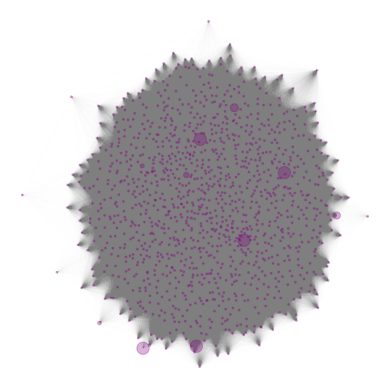

In [32]:
# Lee la imagen
image = plt.imread("grafico.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

**(a)** 
Caracterizar la centralidad de los nodos.

In [33]:
# Agregar las métricas de centralidad al DataFrame ANIMES
ANIMES = ANIMES.assign(
    Closeness_Weighted=g_anime.closeness( weights=g_anime.es['weight']),
    Closeness_Unweighted=g_anime.closeness(),
    Betweenness_Weighted=g_anime.betweenness(directed=False, weights=g_anime.es['weight']),
    Betweenness_Unweighted=g_anime.betweenness(directed=False),
    Eigenvector_Weighted=g_anime.eigenvector_centrality(directed=False, weights=g_anime.es['weight']),
    Eigenvector_Unweighted=g_anime.eigenvector_centrality(directed=False)
)

# Mostrar las primeras filas del DataFrame ANIMES con las nuevas columnas
ANIMES = ANIMES.merge(anime,left_on='anime',right_on="id",how="left")

In [34]:
# Ordenar el DataFrame por las medidas de centralidad y mostrar los 5 principales
top_closeness_weighted = ANIMES.sort_values(by='Closeness_Weighted', ascending=False).head(5)
top_closeness_unweighted = ANIMES.sort_values(by='Closeness_Unweighted', ascending=False).head(5)
top_betweenness_weighted = ANIMES.sort_values(by='Betweenness_Weighted', ascending=False).head(5)
top_betweenness_unweighted = ANIMES.sort_values(by='Betweenness_Unweighted', ascending=False).head(5)
top_eigenvector_weighted = ANIMES.sort_values(by='Eigenvector_Weighted', ascending=False).head(5)
top_eigenvector_unweighted = ANIMES.sort_values(by='Eigenvector_Unweighted', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 Animes con Mayor Closeness Weighted:")
print(top_closeness_weighted[['Name', 'Closeness_Weighted']])
print("\nTop 5 Animes con Mayor Closeness Unweighted:")
print(top_closeness_unweighted[['Name', 'Closeness_Unweighted']])
print("\nTop 5 Animes con Mayor Betweenness Weighted:")
print(top_betweenness_weighted[['Name', 'Betweenness_Weighted']])
print("\nTop 5 Animes con Mayor Betweenness Unweighted:")
print(top_betweenness_unweighted[['Name', 'Betweenness_Unweighted']])
print("\nTop 5 Animes con Mayor Eigenvector Weighted:")
print(top_eigenvector_weighted[['Name', 'Eigenvector_Weighted']])
print("\nTop 5 Animes con Mayor Eigenvector Unweighted:")
print(top_eigenvector_unweighted[['Name', 'Eigenvector_Unweighted']])


Top 5 Animes con Mayor Closeness Weighted:
                                      Name  Closeness_Weighted
1250                 Little Village People                0.99
1248   Baolie Feiche II: Xing Neng Juexing                0.81
1249       Baolie Feiche 3: Shou Shen Heti                0.81
952   Kouya no Kotobuki Hikoutai Kanzenban                0.59
1263              Closers: Side Blacklambs                0.56

Top 5 Animes con Mayor Closeness Unweighted:
                            Name  Closeness_Unweighted
40    Mahou Shoujo Madoka★Magica                  1.00
290  Bishoujo Senshi Sailor Moon                  1.00
144                   Elfen Lied                  1.00
27                     Charlotte                  1.00
23     Shinmai Maou no Testament                  1.00

Top 5 Animes con Mayor Betweenness Weighted:
                                      Name  Betweenness_Weighted
1250                 Little Village People            402,989.42
1248   Baolie Feiche II: Xi

**(b)** 
Visualizar la red con un diseño adecuado teniendo en cuenta la centralidad d 
los nodos.

In [35]:
ig.summary(g_anime)

IGRAPH UNWT 1264 789193 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


**(c)** Identificar los puntos de articulación, los puntos aislados y las componentes.


In [36]:
# Descomponer el grafo y contar los componentes
componentes = g_anime.decompose()
num_componentes = len(componentes)

# Imprimir la longitud de cada componente y enumerarlas
i=0
for  componente in componentes:
    i=i+1
    longitud = len(componente.vs)
    print(f"Componente {i}: Longitud {longitud}")

Componente 1: Longitud 1264


In [37]:
# Encontrar los clanes en el grafo
clanes = g_anime.maximal_cliques()

# Imprimir el número de vértices en cada clan
print("Número de vértices por clan:")
for i, clan in enumerate(clanes, 1):
    num_vertices_clan = len(clan)
    print(f"Clan {i}: {num_vertices_clan} vértices")

Número de vértices por clan:
Clan 1: 54 vértices
Clan 2: 101 vértices
Clan 3: 120 vértices
Clan 4: 120 vértices
Clan 5: 105 vértices
Clan 6: 157 vértices
Clan 7: 289 vértices
Clan 8: 362 vértices
Clan 9: 362 vértices
Clan 10: 431 vértices
Clan 11: 431 vértices
Clan 12: 434 vértices
Clan 13: 434 vértices
Clan 14: 927 vértices
Clan 15: 1010 vértices
Clan 16: 981 vértices
Clan 17: 1022 vértices
Clan 18: 1151 vértices
Clan 19: 1253 vértices


In [38]:
g_anime.articulation_points()

[]

**(d)** Hacer la distribución de las distancia geodésica.


In [39]:
# Obtener los grados de salida y entrada de cada nodo
degree =g_anime.degree(mode='all')
strength=g_anime.strength(weights=g_anime.es['weight'])

# Crear DataFrames separados para los grados de salida y entrada
degree = pd.DataFrame(degree, columns=['degree'])
strength=pd.DataFrame(strength, columns=['strength'])
# Concatenar los DataFrames en uno solo
degree = pd.concat([degree, strength], axis=1)

degree

degree     strength
0       1257 1,363,784.00
1       1258 1,463,961.00
2       1262 5,242,115.00
3       1255    41,340.00
4       1261 2,578,443.00
...      ...          ...
1259     120       127.00
1260     158       201.00
1261     100       100.00
1262      53        53.00
1263     288       288.00

[1264 rows x 2 columns]

C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:605: PlotnineWarning: Filename: fuerza.png
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.
C:\Users\Pc\AppData\Local\Temp\ipykernel_3464\4134862192.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.


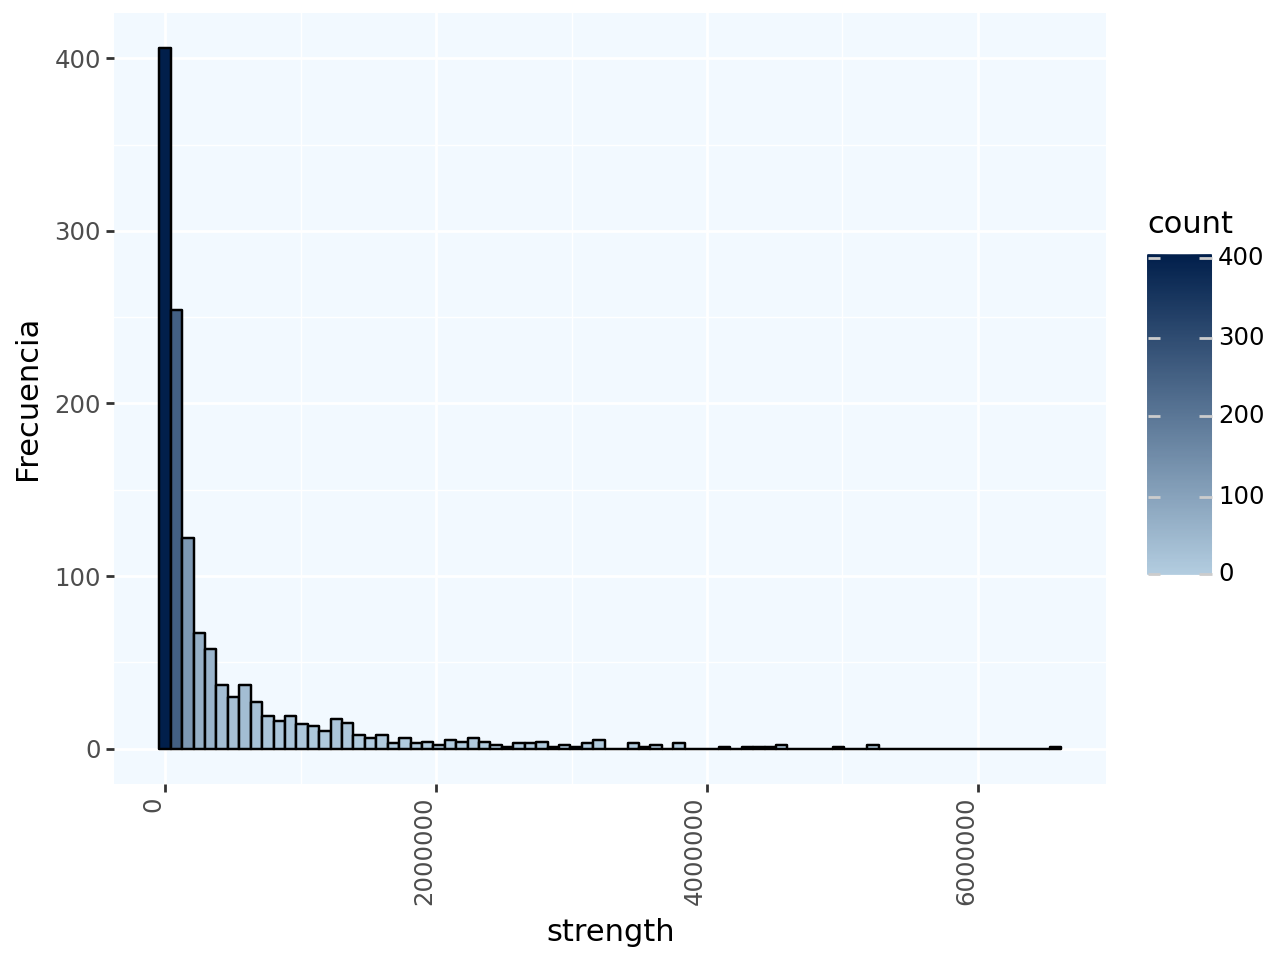

In [40]:
# Crear el histograma
histograma = (
    ggplot(degree, aes(x='strength', fill='..count..')) +  
    geom_histogram(color='black') +
    labs(title='', x='strength', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)
histograma.save("fuerza.png", dpi=300)
# Mostrar el histograma
print(histograma)

**(f)** Hacer un censo de los clanes y calcular el número clan.


In [41]:
ig.summary(g_anime)

IGRAPH UNWT 1264 789193 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [42]:
len(g_anime.largest_cliques()[0])

1253

**(g)** Calcular la densidad junto con el coeficiente de agrupamiento de la red.


In [43]:
g_anime.density()

0.9886960421740482

In [44]:
g_anime.transitivity_avglocal_undirected()# transitividad

0.9978017165977586

In [45]:
ig.summary(g_anime)

IGRAPH UNWT 1264 789193 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


**(h)** Particionar la red usando tres métodos de agrupamiento de su elección. Visualizar los resultados obtenidos.



In [46]:
random.seed(12)
ak_fg=g_anime.community_fastgreedy()

In [47]:
random.seed(12)
ak_im=g_anime.community_infomap()

In [48]:
random.seed(12)
ak_lp=g_anime.community_label_propagation()

In [49]:
random.seed(12)
ak_le=g_anime.community_leading_eigenvector()

In [50]:
random.seed(12)
ak_fg_w=g_anime.community_fastgreedy(weights=g_anime.es['weight'])

In [51]:
random.seed(12)
ak_im_w=g_anime.community_infomap(edge_weights= g_anime.es['weight'])

In [52]:
random.seed(12)
ak_lp_w=g_anime.community_label_propagation(weights= g_anime.es['weight'])

In [53]:
random.seed(12)
ak_le_w=g_anime.community_leading_eigenvector(weights= g_anime.es['weight'])

In [54]:
random.seed(12)
#ak_eb_w=g_anime.community_edge_betweenness(weights=binario)

In [55]:
print("Modularidad de fastgreedy:", round(ak_fg.as_clustering().modularity, 3))
#print("Modularidad de edge betweenness:", round(ak_eb.as_clustering().modularity, 3))
print("Modularidad de infomap:", round(ak_im.modularity, 3))
print("Modularidad de label_propagation:", round(ak_lp.modularity, 3))
print("Modularidad de leading_eigenvector:", round(ak_le.modularity, 3))
#print("Modularidad de edge betweenness weighted:", round(ak_eb_w.as_clustering().modularity, 3))
print("Modularidad de fastgreedy weighted:", round(ak_fg_w.as_clustering().modularity, 3))
print("Modularidad de infomap weighted:", round(ak_im_w.modularity, 3))
print("Modularidad de label_propagation weighted:", round(ak_lp_w.modularity, 3))
print("Modularidad de leading_eigenvector weighted:", round(ak_le_w.modularity, 3))


Modularidad de fastgreedy: 0.001
Modularidad de infomap: 0.0
Modularidad de label_propagation: 0.0
Modularidad de leading_eigenvector: 0.001
Modularidad de fastgreedy weighted: 0.083
Modularidad de infomap weighted: 0.0
Modularidad de label_propagation weighted: 0.0
Modularidad de leading_eigenvector weighted: 0.084


In [56]:
graficoc=ig.plot(g_anime,
         edge_color =adjustcolor('gray',0.004),
        vertex_color= get_colors_for_list(ak_le_w.membership),
        vertex_size=[20 if cg / max * 500 > 20 else (cg / max * 500 if cg / max * 500 > 3 else 3) for cg in betweenness],
        layout=layout)
graficoc.save("graficoc.png")

In [57]:
set(ak_le_w.membership)

{0, 1, 2}

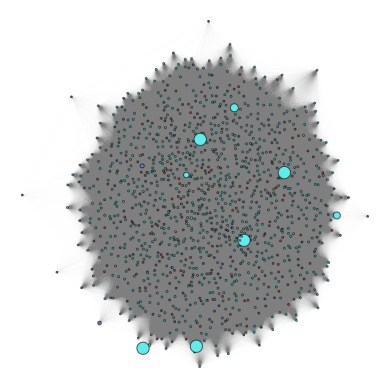

In [58]:
# Lee la imagen
image = plt.imread("graficoc.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

In [59]:
shortest_paths = g_anime.shortest_paths(source=0,weights=g_anime.es['weight'])[0]

C:\Users\Pc\AppData\Local\Temp\ipykernel_3464\1412424233.py:1: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead


In [60]:
shortest_paths

[0.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

**(i)** Hacer un análisis de asortatividad de la red.


In [61]:
g_anime.assortativity_degree(directed=False)

-0.0034701857413091466

# Red Animes Binaria no dirigida

In [62]:
A=g_anime.get_adjacency(attribute = "weight")

In [63]:
g_anime.summary()

'IGRAPH UNWT 1264 789193 -- \n+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)'

In [64]:
conteo=(usuarios
.groupby(["anime_id"])
.agg(conteo=("anime_id","count")).reset_index()
)


In [65]:
conteo=(usuarios
.groupby(["anime_id"])
.agg(conteo=("anime_id","count")).reset_index()
)

usuarios=usuarios.merge(conteo,left_on="anime_id",right_on="anime_id",how="left")


In [66]:
conteo=usuarios['conteo']

In [67]:
A.shape[1]

1264

In [68]:
X = np.empty((0, A.shape[1]))

# Función que se aplicará a cada fila
def funcion(x, factor):
    return np.where(factor * 0.75 <= x, 1, 0)

# Iterar sobre los índices
for i in range(A.shape[0]):
    fila_transformada = funcion(A[i, :], usuarios['conteo'][i])
    X = np.vstack([X, fila_transformada])


In [69]:
g2=ig.Graph.Adjacency(X)

In [70]:
g_anime2=g2.as_undirected()

In [71]:
random.seed(12)
betweenness=g_anime2.betweenness()
max=np.max(betweenness)
g_anime2.vs['color'] = adjustcolor('pink',0.5)
grafico2=ig.plot(g_anime2,
               edge_color =adjustcolor('gray',0.025),
               vertex_frame_color =adjustcolor('purple',0.5),
               vertex_size=[25 if cg / max * 500 > 25 else (cg / max * 500 if cg / max * 500 > 3 else 3) for cg in betweenness],
               layout=layout)

grafico2.save("grafico2.png")

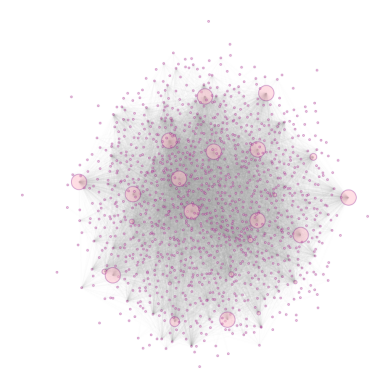

In [72]:
# Lee la imagen
image = plt.imread("grafico2.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

In [73]:
ANIMES = pd.DataFrame((usuarios['anime_id'].unique(),  # Obtener valores únicos de la segunda columna
                  (np.full(len(usuarios['anime_id'].unique()), len(usuarios['user_id'].unique())) + range(len(usuarios['anime_id'].unique())))),  # Generar identificadores únicos
                      #ya hay identificadores unicos para todos los usuarios
                      # toca generar identificadores unicos para todos los animes
                 index=['anime', 'Identificador']).T  # Transponer para obtener un DataFrame
# Agregar las métricas de centralidad al DataFrame ANIMES
ANIMES = ANIMES.assign(
   
    Closeness_Unweighted=g_anime2.closeness(),

    Betweenness_Unweighted=g_anime2.betweenness(directed=False),

    Eigenvector_Unweighted=g_anime2.eigenvector_centrality(directed=False)
)

# Mostrar las primeras filas del DataFrame ANIMES con las nuevas columnas
ANIMES = ANIMES.merge(anime,left_on='anime',right_on="id",how="left")

# Ordenar el DataFrame por las medidas de centralidad y mostrar los 5 principales
top_closeness_unweighted = ANIMES.sort_values(by='Closeness_Unweighted', ascending=False).head(5)
top_betweenness_unweighted = ANIMES.sort_values(by='Betweenness_Unweighted', ascending=False).head(5)
top_eigenvector_unweighted = ANIMES.sort_values(by='Eigenvector_Unweighted', ascending=False).head(5)

# Mostrar los resultados
print("\nTop 5 Animes con Mayor Closeness Unweighted:")
print(top_closeness_unweighted[['Name', 'Closeness_Unweighted']])
print("\nTop 5 Animes con Mayor Betweenness Unweighted:")
print(top_betweenness_unweighted[['Name', 'Betweenness_Unweighted']])
print("\nTop 5 Animes con Mayor Eigenvector Unweighted:")
print(top_eigenvector_unweighted[['Name', 'Eigenvector_Unweighted']])


Top 5 Animes con Mayor Closeness Unweighted:
                                     Name  Closeness_Unweighted
118  One Piece Movie 5: Norowareta Seiken                  0.95
78        Kara no Kyoukai 1: Fukan Fuukei                  0.90
150                Natsume Yuujinchou San                  0.80
158                           Zombie-Loan                  0.79
124                                Trigun                  0.72

Top 5 Animes con Mayor Betweenness Unweighted:
                                     Name  Betweenness_Unweighted
118  One Piece Movie 5: Norowareta Seiken               64,189.11
78        Kara no Kyoukai 1: Fukan Fuukei               36,944.35
150                Natsume Yuujinchou San               15,552.56
158                           Zombie-Loan               14,127.91
663                    Papa datte, Shitai                8,053.22

Top 5 Animes con Mayor Eigenvector Unweighted:
                                     Name  Eigenvector_Unweighted
78        Ka

In [74]:

# Obtener los grados de salida y entrada de cada nodo
degree =g_anime2.degree(mode='all')

# Crear DataFrames separados para los grados de salida y entrada
degree = pd.DataFrame(degree, columns=['degree'])

degree

degree
0         45
1         47
2        129
3          2
4         81
...      ...
1259       0
1260       0
1261       0
1262       0
1263       0

[1264 rows x 1 columns]

C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:605: PlotnineWarning: Filename: degree.png
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 238'. Pick better value with 'binwidth'.
C:\Users\Pc\AppData\Local\Temp\ipykernel_3464\2505921819.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 238'. Pick better value with 'binwidth'.


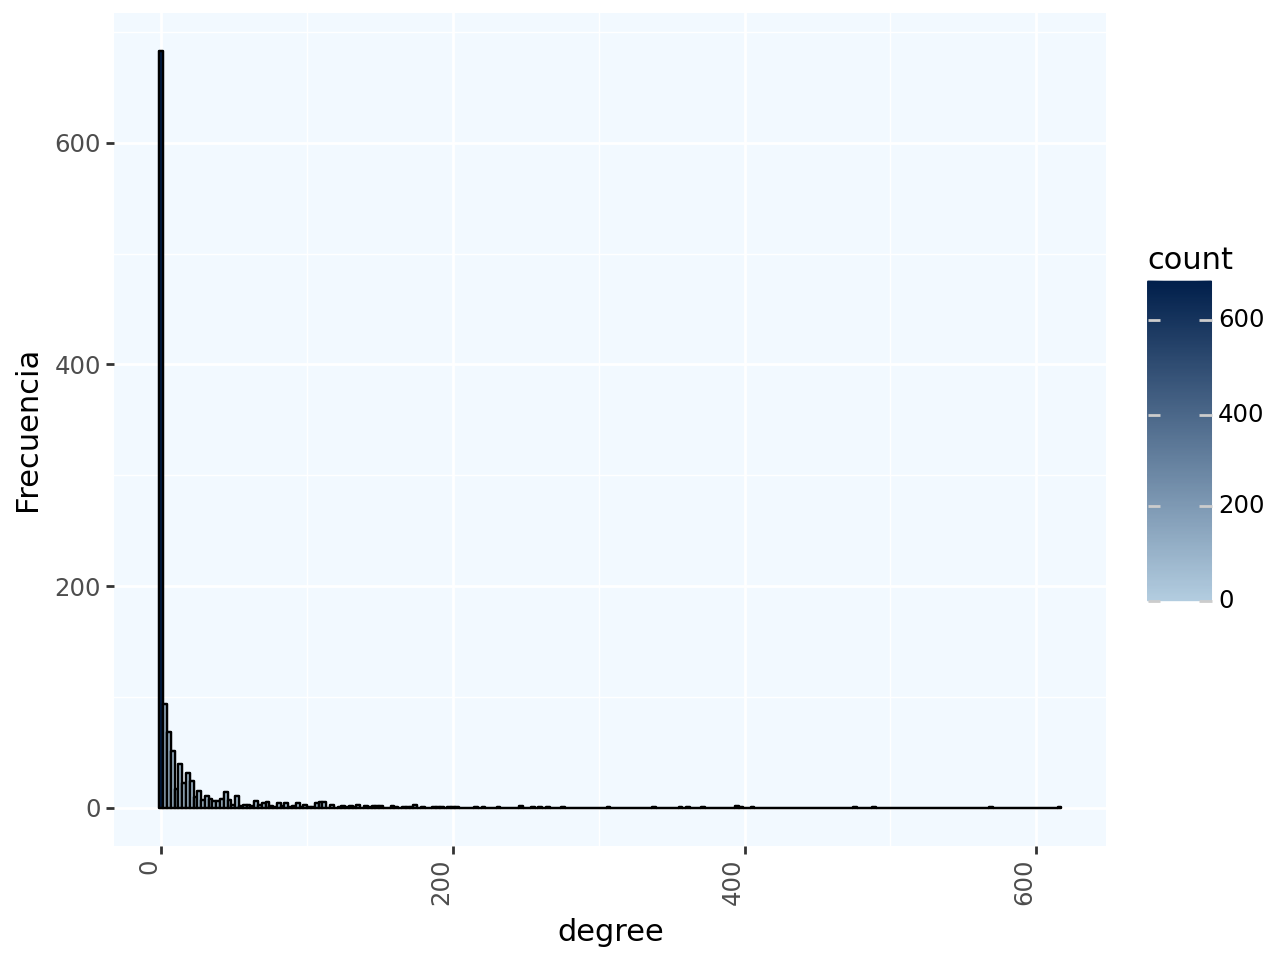

In [75]:
# Crear el histograma
histogramadegree = (
    ggplot(degree, aes(x='degree', fill='..count..')) +  
    geom_histogram(color='black') +
    labs(title='', x='degree', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)
histogramadegree.save("degree.png", dpi=300)
# Mostrar el histograma
print(histogramadegree)

In [76]:

g_anime2.density()

0.01640282830712489

In [77]:
 g_anime2.transitivity_avglocal_undirected()# transitividad

0.8881851172306844

In [78]:
 g_anime2 =  g_anime2.clusters().giant()

C:\Users\Pc\AppData\Local\Temp\ipykernel_3464\1297444792.py:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead


In [79]:
random.seed(12)
ak_fg=g_anime2.community_fastgreedy()
ak_im=g_anime2.community_infomap()
ak_lp=g_anime2.community_label_propagation()
ak_le=g_anime2.community_leading_eigenvector()
print("Modularidad de fastgreedy:", round(ak_fg.as_clustering().modularity, 3))

print("Modularidad de infomap:", round(ak_im.modularity, 3))
print("Modularidad de label_propagation:", round(ak_lp.modularity, 3))
print("Modularidad de leading_eigenvector:", round(ak_le.modularity, 3))



Modularidad de fastgreedy: 0.186
Modularidad de infomap: 0.0
Modularidad de label_propagation: 0.0
Modularidad de leading_eigenvector: 0.198


In [80]:
set(ak_le.membership)

{0, 1, 2, 3}

In [105]:
random.seed(12)
layout = g_anime2.layout_davidson_harel()

In [104]:

ig.plot(g_anime2,
        edge_color =adjustcolor('gray',0.1),
        vertex_color= get_colors_for_list(ak_le.membership,alpha=0.7),
        vertex_size=[20 if cg / max * 500 > 20 else (cg / max * 500 if cg / max * 500 > 5 else 5) for cg in g_anime2.betweenness()],
        layout=layout)